In [4]:
%matplotlib notebook
from matplotlib.pyplot import *
from numpy import *
from audio.coders import *
from bitstream import *
from IPython.display import *
import audio.wave as wave

import scipy.io
from scipy.signal import lfilter

In [5]:
def freq(N,Fe=1):
    """ Retourne un vecteur de fréquences normalisées 
    entre -0.5 et 0.5 sur N points """
    return (arange(N)/N-1/2)*Fe

In [6]:
#On souhaite à présent modifier le contenu spectral du signal \(x\) par différents
#filtres numériques de fonction de transfert \(H(z)=B(z)/A(z)\). 
#Une fonction standard Python vous sera très utile :

    #lfilter qui implémente l'équation aux différences~:
    #cette fonction calcule le vecteur y des sorties d'un filtre numérique spécifié
    #par le vecteur \(B\) des coefficients du numérateur \(B(z)\), le vecteur \(A\)
    #des coefficients du dénominateur \(A(z)\), pour un vecteur d'entrées \(x\),
    #suivant l'instruction~: y=filter(B,A,x)

    #freqz qui calcule la réponse fréquentielle \(H\)(e\(^{j2\pi f / Fe})\) en module
    #et phase pour un filtre spécifié par les deux vecteurs \(B\) et \(A\)
    #des coefficients de la fonction de transfert~: freqz(B,A)


In [7]:
N=441000
df = 44100
dt = 1.0 / df
t = r_[0:N] * dt
f= 440

In [8]:
Audio("Liem - If Only (Lehult).wav")

<IPython.core.display.Javascript object>


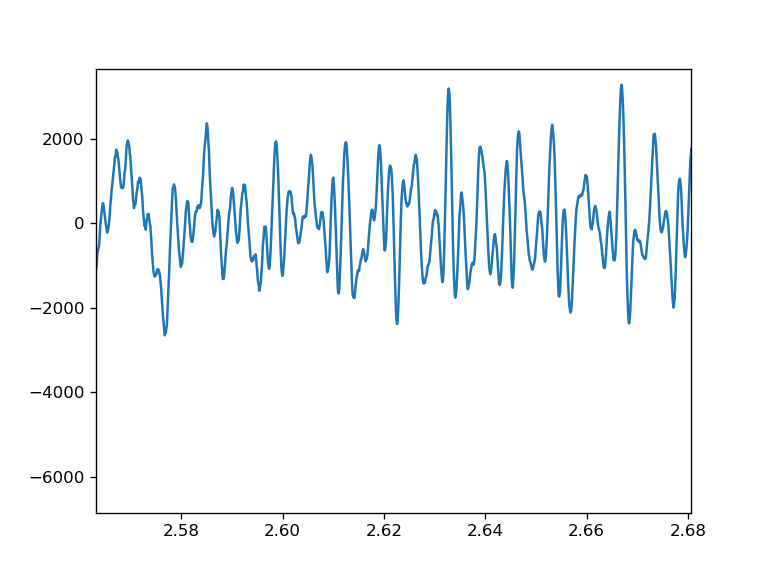

In [9]:
figure()
data1= wave.read("Liem - If Only (Lehult).wav", scale=False)[0]
plot(t, data1)

<IPython.core.display.Javascript object>


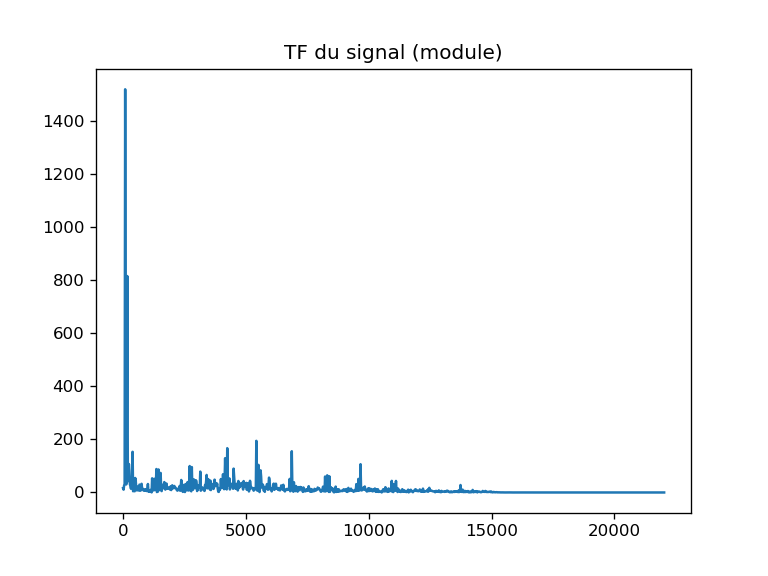

1024

In [10]:
import scipy.io
from scipy.signal import lfilter
from audio.filters import *
from audio.fourier import F

Fx = F(data1, dt=dt, power_of_two=True)
f2 = r_[0.0:df/2.0:df/2.0/2**10]
figure()
plot(f2, abs(Fx(f2)))
title('TF du signal (module)')
display(len(f2))
#show()

In [11]:
tau=1000
fo=8000
a=exp(-1.j*2*pi*fo*tau)
x6=Fx*a
data2=ifft(x6)
figure()
plot(f2, data2)

TypeError: unsupported operand type(s) for *: 'function' and 'complex'

<IPython.core.display.Javascript object>


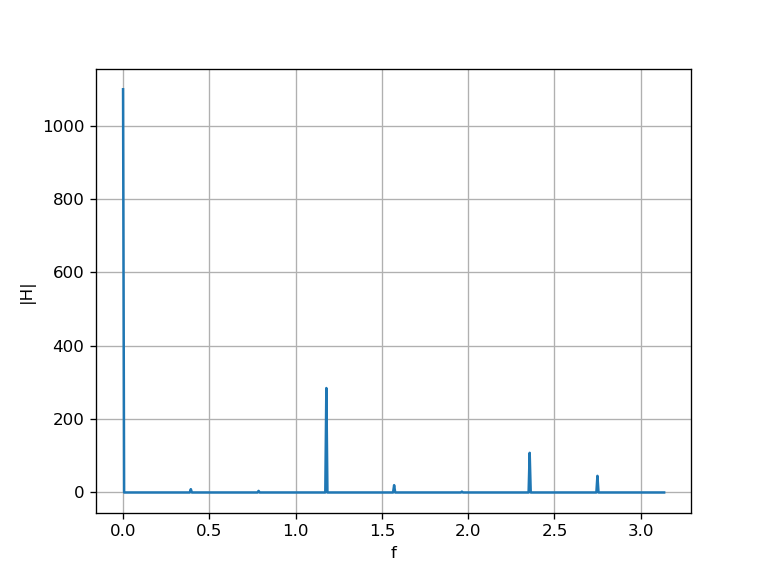

In [35]:
tau=1
fo=1
a=exp(-1.j*2*pi*fo*tau)
[w1,h1] = scipy.signal.freqz(a,1)
figure()
plot(w,h)
xlabel('f')
ylabel('|H|')
grid()

<IPython.core.display.Javascript object>


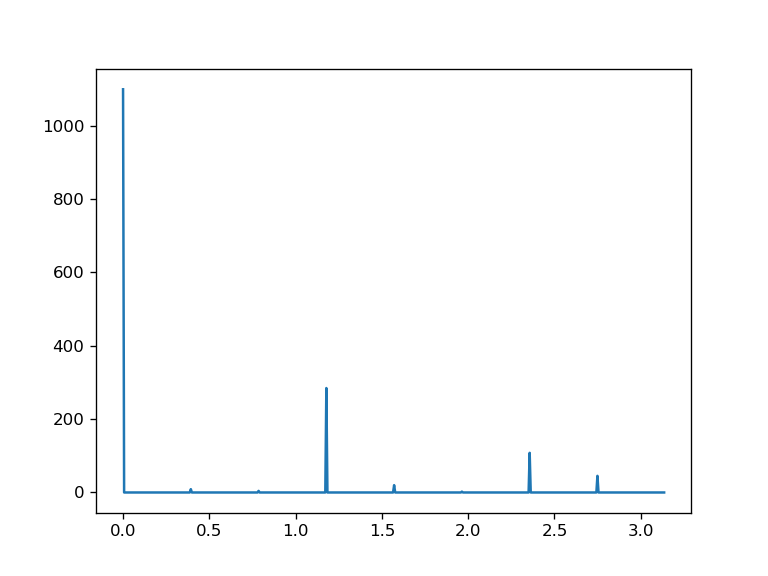

array([2.        , 1.07376978, 0.71481349, ..., 0.67823823, 0.71481349,
       1.07376978])

array([   0,    0,    0, ..., 2404, 2451, 2504], dtype=int16)

array([    0.        ,     0.        ,     0.        , ...,
       29053.05702254, 32172.36888299, 35386.40755804])

<IPython.core.display.Javascript object>


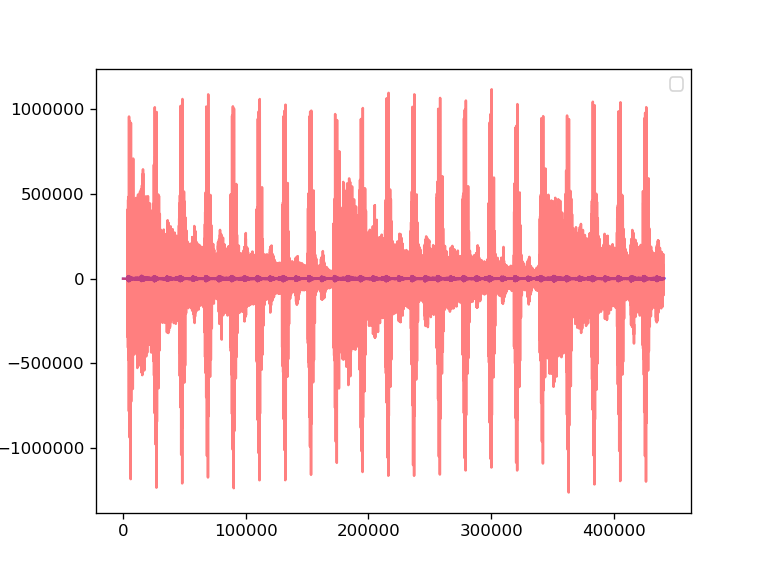

In [33]:
tau1=100
fo=8000
tau=10
n1=1000
n=10511
L=50
n=511
g=0.5
df = 1600
dt = 1.0 / df
f2 = r_[0.0:df/2.0:df/2.0/2**10]
fonction=1/sqrt(1+(g**2)-(2*g*cos(2*pi*f2*tau)))
x3 = lfilter(fonction,1,data1)
w,h=scipy.signal.freqz(fonction,1)
figure()
plot(w,h)
#x3 = dt * convolve(inverse,data1,mode="same")
display(fonction)
display(data1)
#display(inverse)
len(data1), len(x3)
x3 = x3[n//2:-(n//2)]
display(x3)
figure()
plot(data1, "b", alpha=0.5)
plot(x3, "r", alpha=0.5)
legend()
display(Audio("Liem - If Only (Lehult).wav"))
wave.write(x3, "x3.wav", df=df)
display(Audio("x3.wav"))